In [49]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [50]:
im = cv2.imread('image.png')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(im.shape)

(333, 500, 3)


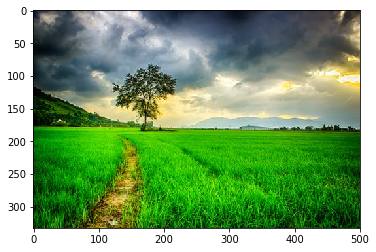

In [51]:
plt.imshow(im)
plt.show()

In [52]:
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(166500, 3)


In [53]:
from sklearn.cluster import KMeans

In [54]:
dominant_colors = 7
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=7, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [55]:
centers = km.cluster_centers_
centers = np.array(centers,dtype='uint8')

In [56]:
centers

array([[137, 151, 147],
       [ 54, 184,   8],
       [211, 209, 175],
       [ 67,  79,  85],
       [ 15,  54,  11],
       [136, 144,  36],
       [ 18, 126,   5]], dtype=uint8)

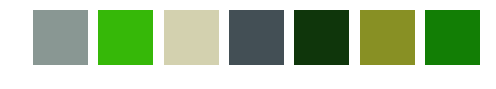

In [57]:
i=1
plt.figure(0,figsize=(8,2))
colors = []

for each_col in centers:
    plt.subplot(1,7,i)
    plt.axis("off")
    i+=1
    
    colors.append(each_col)
    
    a=np.zeros((100,100,3),dtype="uint8")
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()

In [58]:
new_img = np.zeros((333*500,3),dtype='uint8')

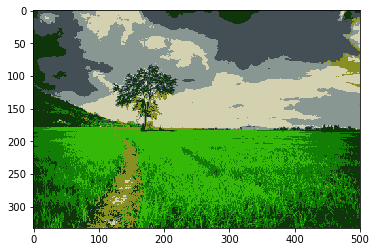

In [59]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()